In [166]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Wszystkie dane pogrupowane i posortowane : company_name, time

In [167]:
df = pd.read_csv('data/results.csv', usecols=['company_name', 'time', 'salary', 'title', 'link'], index_col=['company_name', 'time'], na_values=['EMPTY'])

In [168]:
df = df.sort_values(['company_name', 'time'], inplace=False)

In [169]:
df.to_csv('results.csv')

In [170]:
df_sort = df.sort_values(['company_name', 'time'], inplace=False)

In [171]:
df_sort.to_csv('results.csv')

### Rankig firm : ilość wystawionych ofert

In [172]:
df1 = pd.read_csv('data/results.csv', usecols=['company_name', 'time'], na_values=['BRAK_NAZWY'])

In [173]:
df_company = df1['company_name'].value_counts()

In [174]:
df_company.to_csv('total_amount.csv')

/home/adsum/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


### Ranking dni tygodnia : ilość wystawionych ofert przez wszystkie firmy

In [175]:
df1.time.value_counts()

144    81
72     80
96     77
120    65
168    51
3      43
24     23
9      15
48     13
7       4
2       4
1       3
21      3
8       2
18      2
6       1
15      1
Name: time, dtype: int64

In [176]:
ilosc = [sum(df1.time < 24), sum(df1.time == 24), sum(df1.time == 48), sum(df1.time == 72), sum(df1.time == 96), sum(df1.time == 120), sum(df1.time == 144), sum(df1.time == 168)][::-1]

In [177]:
ilosc

[51, 81, 65, 77, 80, 13, 23, 78]

In [178]:
sum(df1.time.value_counts()) == sum(ilosc)

True

In [179]:
df1.time.value_counts() / df1.time.count()

144    0.173077
72     0.170940
96     0.164530
120    0.138889
168    0.108974
3      0.091880
24     0.049145
9      0.032051
48     0.027778
7      0.008547
2      0.008547
1      0.006410
21     0.006410
8      0.004274
18     0.004274
6      0.002137
15     0.002137
Name: time, dtype: float64

In [180]:
procent = [sum(df1.time < 24) / df1.time.count(), sum(df1.time == 24) / df1.time.count(), sum(df1.time == 48) / df1.time.count(), sum(df1.time == 72) / df1.time.count(), sum(df1.time == 96) / df1.time.count(), sum(df1.time == 120) / df1.time.count(), sum(df1.time == 144) / df1.time.count(), sum(df1.time == 168) / df1.time.count()][::-1]

In [181]:
procent

[0.10897435897435898,
 0.17307692307692307,
 0.1388888888888889,
 0.16452991452991453,
 0.17094017094017094,
 0.027777777777777776,
 0.049145299145299144,
 0.16666666666666666]

In [182]:
sum(df1.time.value_counts() / df1.time.count())

0.9999999999999999

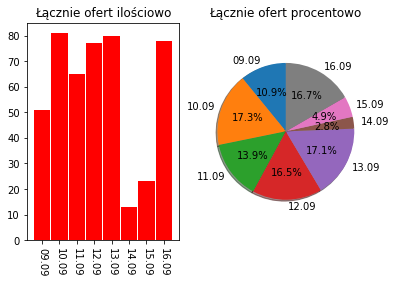

In [183]:
odp = ["09.09", "10.09", "11.09", "12.09", "13.09", "14.09", "15.09", "16.09"]
fig = plt.figure()
plt.subplot(1,2,1)
plt.title("Łącznie ofert ilościowo")
x = np.arange(len(ilosc))
s = 0.95
plt.bar(x, ilosc, s, color = 'r')
plt.xticks(x, odp, rotation = -90)
plt.subplot(1,2,2)
plt.title("Łącznie ofert procentowo")
plt.pie(procent, labels = odp, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis("equal")
fig.savefig('orders_per_day.pdf')

### Ranking dni tygodnia : ilość wystawionych ofert przez top3 firmy

In [184]:
df_pona_care = df1[df1['company_name'] == "PonaCare"]

ilosc_pona_care = [sum(df_pona_care.time < 24), sum(df_pona_care.time == 24), sum(df_pona_care.time == 48), sum(df_pona_care.time == 72), sum(df_pona_care.time == 96), sum(df_pona_care.time == 120), sum(df_pona_care.time == 144), sum(df_pona_care.time == 168)][::-1]

In [185]:
df_amber_care_24 = df1[df1['company_name'] == "Ambercare24"]

ilosc_amber_care_24 = [sum(df_amber_care_24.time < 24), sum(df_amber_care_24.time == 24), sum(df_amber_care_24.time == 48), sum(df_amber_care_24.time == 72), sum(df_amber_care_24.time == 96), sum(df_amber_care_24.time == 120), sum(df_amber_care_24.time == 144), sum(df_amber_care_24.time == 168)][::-1]

In [186]:
df_empty = df1[df1['company_name'] == "EMPTY"]

ilosc_empty = [sum(df_empty.time < 24), sum(df_empty.time == 24), sum(df_empty.time == 48), sum(df_empty.time == 72), sum(df_empty.time == 96), sum(df_empty.time == 120), sum(df_empty.time == 144), sum(df_empty.time == 168)][::-1]

In [187]:
df_agatakaczmarek = df1[df1['company_name'] == "agatakaczmarek"]

ilosc_agatakaczmarek = [sum(df_agatakaczmarek.time < 24), sum(df_agatakaczmarek.time == 24), sum(df_agatakaczmarek.time == 48), sum(df_agatakaczmarek.time == 72), sum(df_agatakaczmarek.time == 96), sum(df_agatakaczmarek.time == 120), sum(df_agatakaczmarek.time == 144), sum(df_agatakaczmarek.time == 168)][::-1]

In [188]:
df_amber_care_24_zoo = df1[df1['company_name'] == "Ambercare24 sp. z o.o. sp. komandytowa"]

ilosc_amber_care_24_zoo = [sum(df_amber_care_24_zoo.time < 24), sum(df_amber_care_24_zoo.time == 24), sum(df_amber_care_24_zoo.time == 48), sum(df_amber_care_24_zoo.time == 72), sum(df_amber_care_24_zoo.time == 96), sum(df_amber_care_24_zoo.time == 120), sum(df_amber_care_24_zoo.time == 144), sum(df_amber_care_24_zoo.time == 168)][::-1]

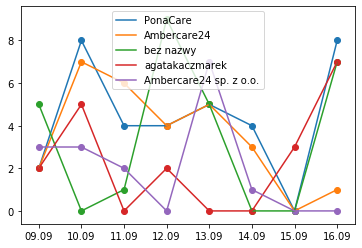

In [189]:
fig = plt.figure()
plt.plot(odp, ilosc_pona_care, label = "PonaCare")
plt.scatter(odp, ilosc_pona_care)
plt.plot(odp, ilosc_amber_care_24, label = "Ambercare24")
plt.scatter(odp, ilosc_amber_care_24)
plt.plot(odp, ilosc_empty, label = "bez nazwy")
plt.scatter(odp, ilosc_empty)
plt.plot(odp, ilosc_agatakaczmarek, label = "agatakaczmarek")
plt.scatter(odp, ilosc_agatakaczmarek)
plt.plot(odp, ilosc_amber_care_24_zoo, label = "Ambercare24 sp. z o.o.")
plt.scatter(odp, ilosc_amber_care_24_zoo)
plt.legend()
fig.savefig('orders_per_day_top5.pdf')